In [13]:
library(ggplot2)
library(tidyr)
library(GGally)
library(dplyr)
library(readr)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  carat = col_double(),
  cut = col_character(),
  color = col_character(),
  clarity = col_character(),
  depth = col_double(),
  table = col_double(),
  price = col_double(),
  x = col_double(),
  y = col_double(),
  z = col_double()
)


Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 8 rows containing missing values (geom_bar)."


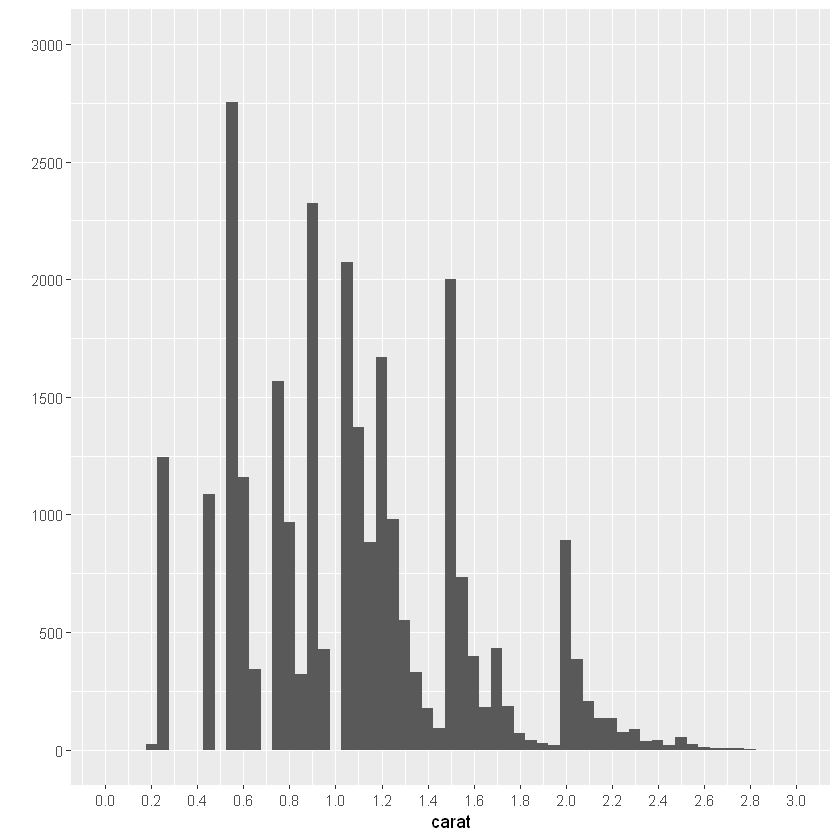

In [19]:
# histogram of diamond carat
diamonds <- read_csv("C:/Users/kgtrm/Documents/R projects data/diamonds.csv")
qplot(x = carat, data = diamonds, binwidth = 0.05) + 
    scale_x_continuous(limits = c(0,3), breaks = seq(0, 3, 0.2)) +
    scale_y_continuous(limits = c(0, 3000), breaks = seq(0, 3000, 500))
# made several adjusments to make the graph actually readable

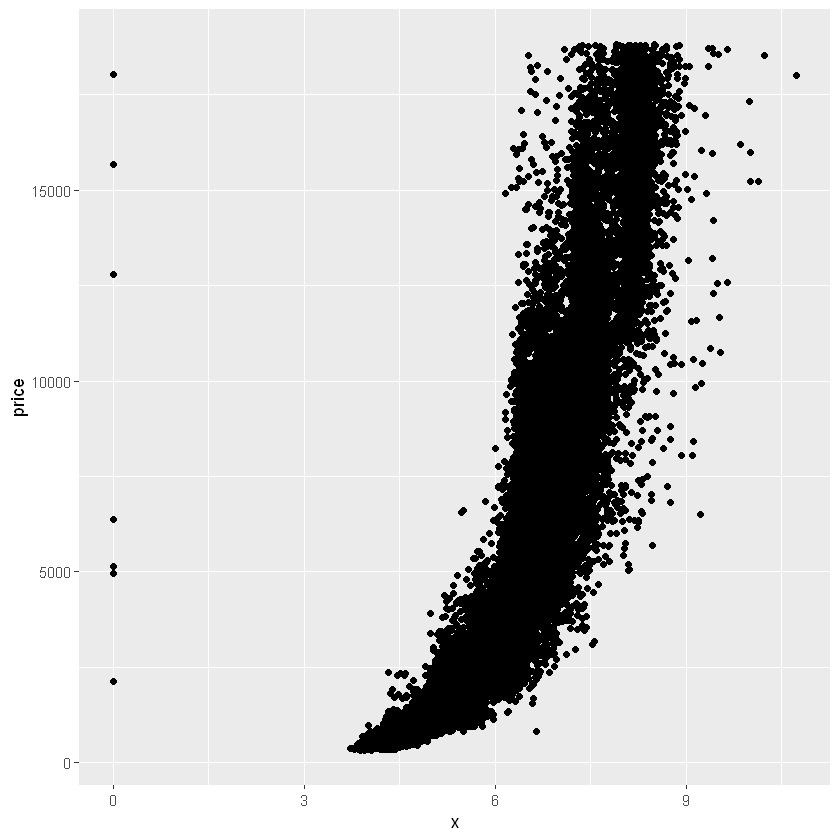

In [20]:
# scatterplot for price vs length (x)
scat_plot <- ggplot(aes(x = x, y = price), data = diamonds) +
    geom_point()

scat_plot

In [22]:
# correlation between price and each measurement
# recall that x = length, y = height, z = depth (I think)
cor(x = diamonds$price, y = diamonds$x)
cor(x = diamonds$price, y = diamonds$y)
cor(x = diamonds$price, y = diamonds$z)

[1] 0.8844352

[1] 0.8654209

[1] 0.8612494

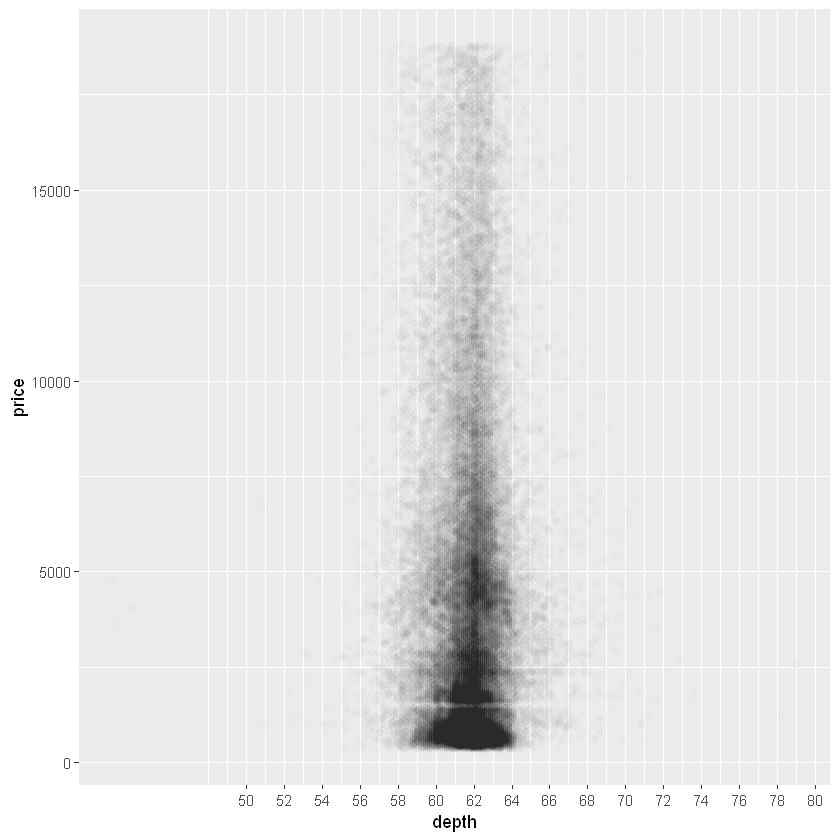

In [23]:
# scatterplot: depth vs price
scat_dvp = ggplot(aes(x = depth, y = price), data = diamonds) +
    geom_point(alpha = 0.01) +
    scale_x_continuous(breaks = seq(50, 80, 2))

scat_dvp

In [24]:
# check for a correlation between price and depth
cor(x = diamonds$price, y = diamonds$depth)
# no

[1] -0.0106474

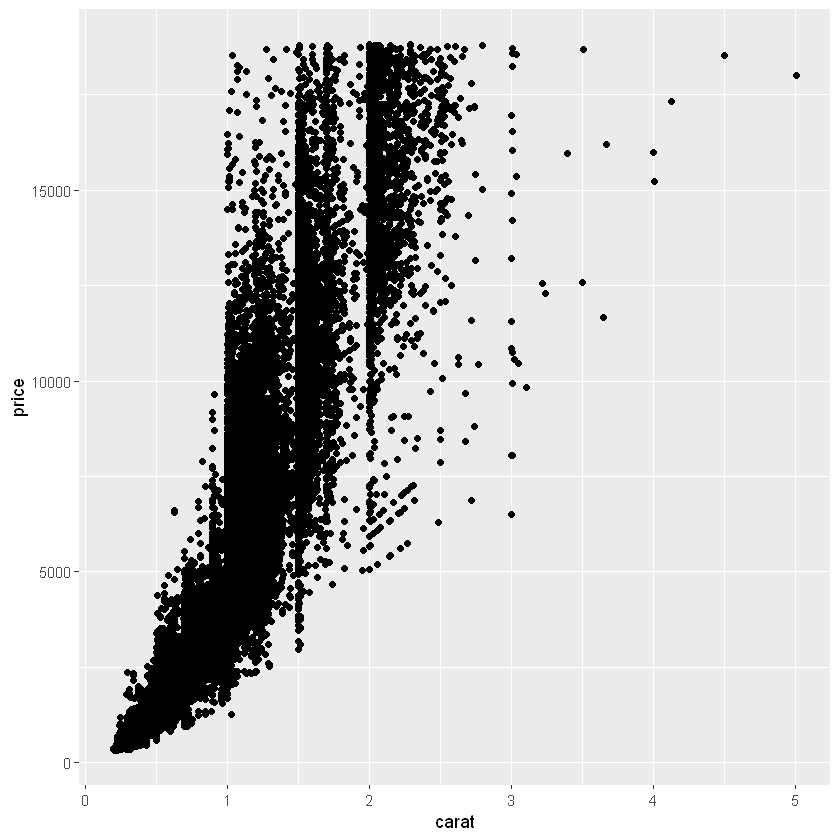

In [26]:
# scatterplot for carat vs price
scat_cvp = ggplot(aes(x = carat, y = price), data = diamonds) +
    geom_point()

scat_cvp

Warning message:
"Removed 17 rows containing missing values (geom_point)."


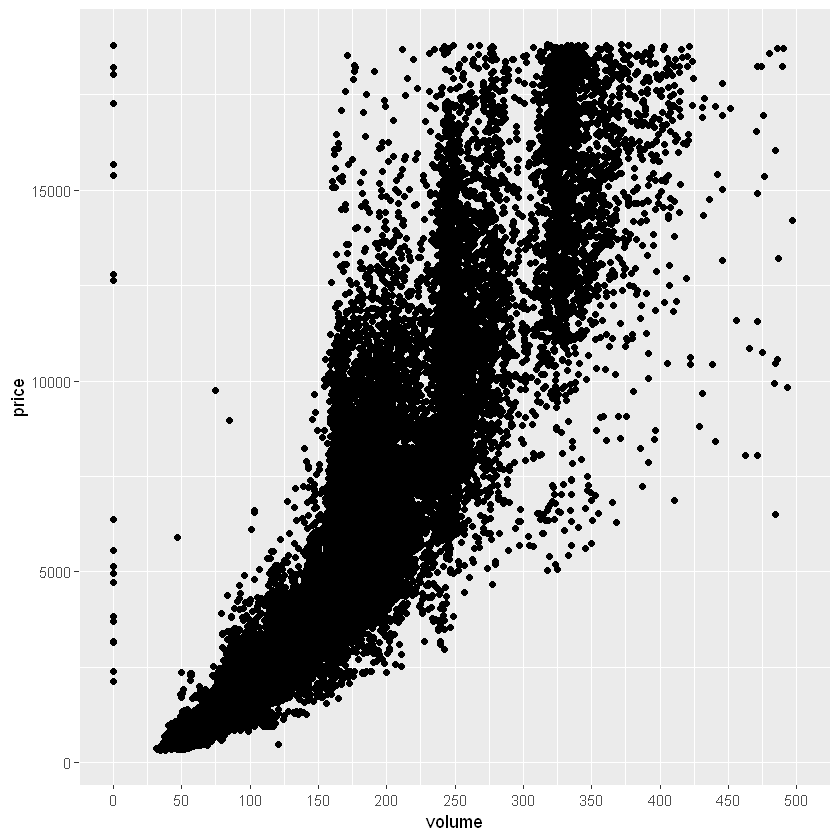

In [28]:
# like mutate
diamonds$volume = diamonds$x * diamonds$y * diamonds$z

scat_vvp = ggplot(aes(x = volume, y = price), data = diamonds) +
    geom_point()+
    scale_x_continuous(limits = c(0, 500), breaks = seq(0, 500, 50))

scat_vvp

In [29]:
# now let's filter by volume != 0 and < 800

diamonds_cleaned <- diamonds[diamonds$volume != 0 & diamonds$volume < 800,]
str(diamonds_cleaned)

tibble [53,917 x 11] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53917] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : chr [1:53917] "Ideal" "Premium" "Good" "Premium" ...
 $ color  : chr [1:53917] "E" "E" "E" "I" ...
 $ clarity: chr [1:53917] "SI2" "SI1" "VS1" "VS2" ...
 $ depth  : num [1:53917] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53917] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : num [1:53917] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53917] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53917] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53917] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...
 $ volume : num [1:53917] 38.2 34.5 38.1 46.7 51.9 ...


In [30]:
# calculate correlation between price and volume now
# we will avoid erros since we removed outliers and zeros
cor(diamonds_cleaned$price, diamonds_cleaned$volume)
# highest yet!

[1] 0.9235455

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 14 rows containing missing values (geom_point)."


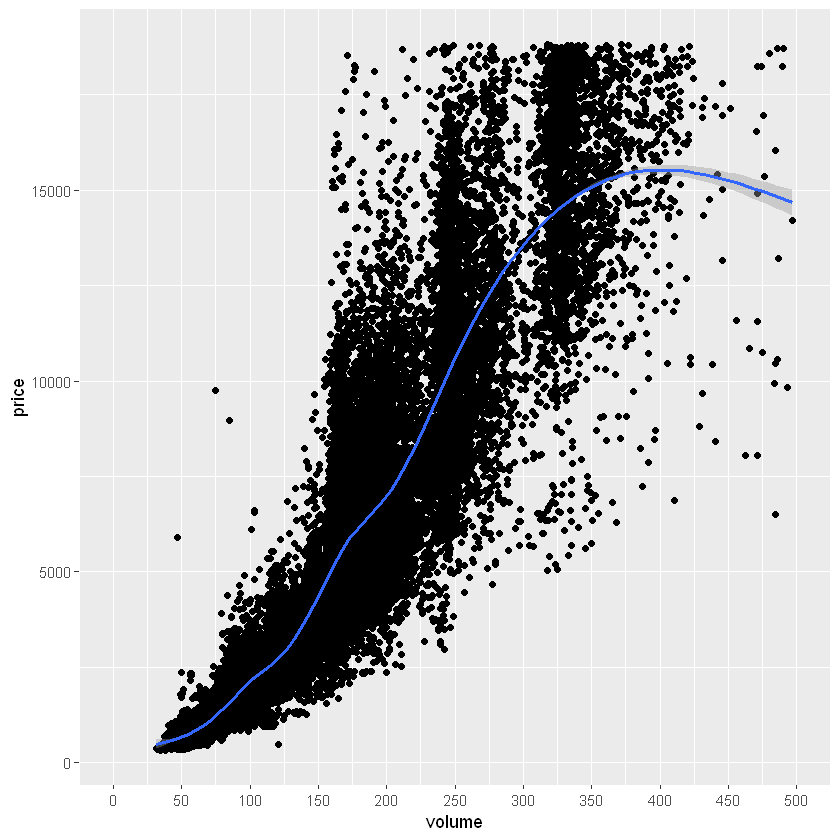

In [32]:
# plot volume vs price now (with filtered sete)
scat_vvpf = ggplot(aes(x = volume, y = price), data = diamonds_cleaned) +
    geom_point() +
    scale_x_continuous(limits = c(0, 500), breaks = seq(0, 500, 50)) + 
    geom_smooth()

scat_vvpf

In [ ]:
# there was a section to detach plyr before loading dplyr here
# that may not be necessary for me

In [35]:
# group diamonds by clarity; create new dataset with mean and median price,
# minimum and maximum in the group, number of diamonds in each group

diamondsByClarity <- diamonds %>%
    group_by(clarity) %>%
    summarize(mean_price = mean(price, na.rm = TRUE),
             meadian_price = median(price, na.rm = TRUE),
             min_price = min(price, na.rm = TRUE), 
             max_price = max(price, na.rm = TRUE), 
             count = n()) %>%
    arrange(clarity)

diamondsByClarity

clarity,mean_price,meadian_price,min_price,max_price,count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
I1,3924.169,3344,345,18531,741
IF,2864.839,1080,369,18806,1790
SI1,3996.001,2822,326,18818,13065
SI2,5063.029,4072,326,18804,9194
VS1,3839.455,2005,327,18795,8171
VS2,3924.989,2054,334,18823,12258
VVS1,2523.115,1093,336,18777,3655
VVS2,3283.737,1311,336,18768,5066


In [38]:
diamonds_by_clarity <- group_by(diamonds, clarity)
diamonds_mp_by_clarity <- summarize(diamonds_by_clarity, mean_price = mean(price, na.rm = TRUE))
diamonds_mp_by_clarity$clarity <- as.factor(diamonds_mp_by_clarity$clarity)

head(diamonds_mp_by_clarity)
# we change the type of clarity from character to factor to use in the next plot

clarity,mean_price
<fct>,<dbl>
I1,3924.169
IF,2864.839
SI1,3996.001
SI2,5063.029
VS1,3839.455
VS2,3924.989


In [39]:
# clarity vs mean price of that data
p1 <- ggplot(aes(x = clarity, y = mean_price), data = diamonds_mp_by_clarity) +
    geom_point()

#group diamonds by color and make a plot (like we just did with clarity)
diamonds_by_color <- group_by(diamonds, color)
diamonds_mp_by_color <- summarize(diamonds_by_color, mean_price = mean(price))
diamonds_mp_by_color$color <- as.factor(diamonds_mp_by_color$color)

p2 <- ggplot(aes(x = color, y = mean_price), data = diamonds_mp_by_color) + 
    geom_point()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




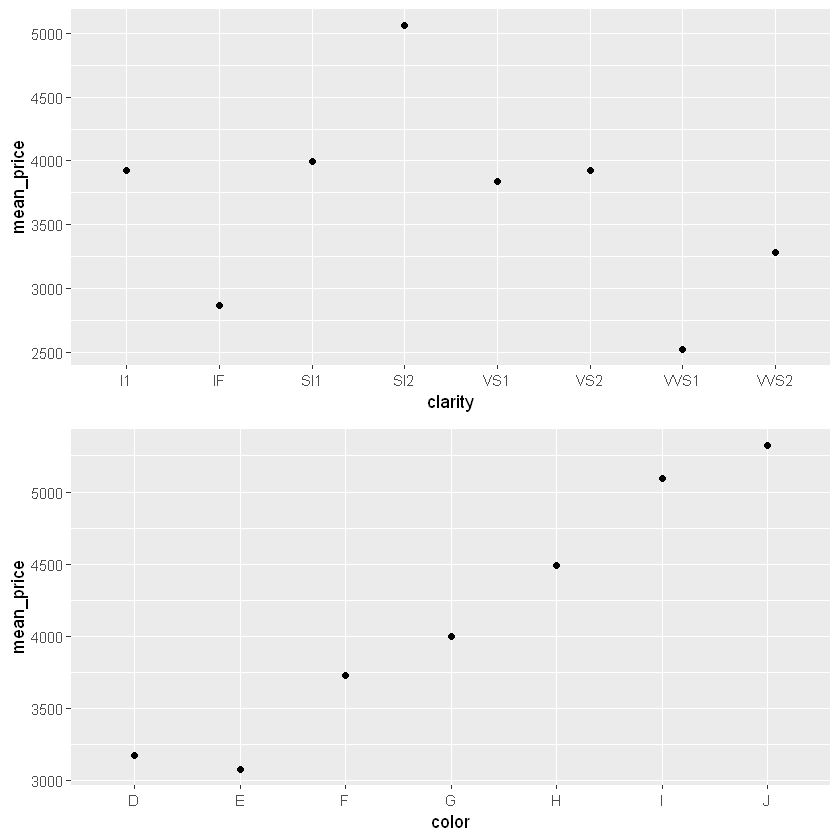

In [42]:
# display both plots together after adding necessary library
library(gridExtra)
grid.arrange(p1, p2, ncol=1)

Warning message:
"Ignoring unknown parameters: binwidth"
Warning message:
"Removed 5 rows containing missing values (geom_point)."


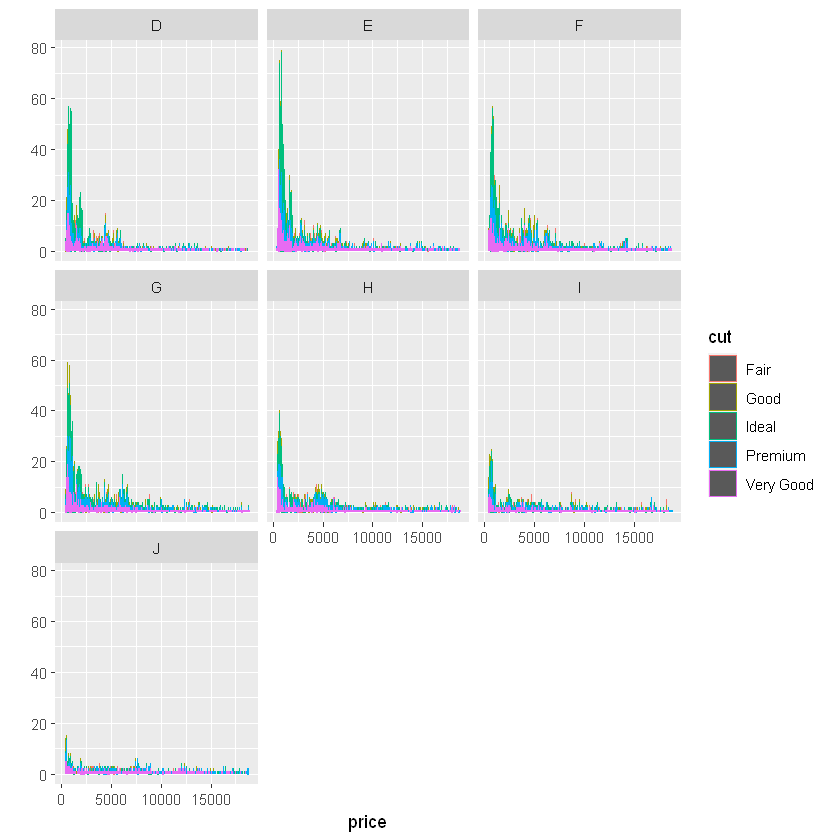

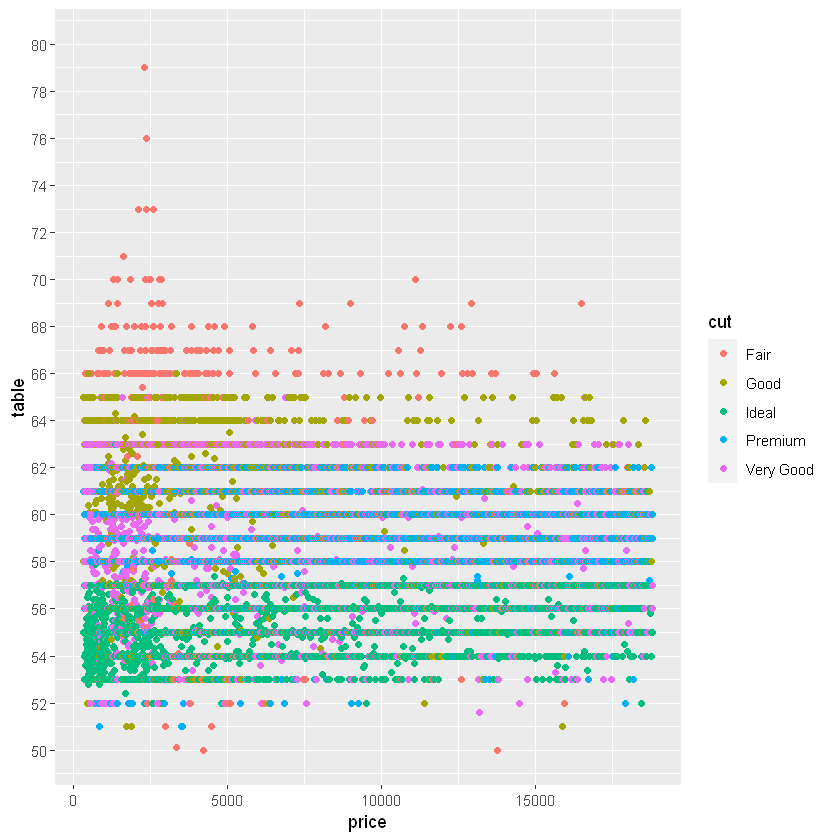

In [43]:
# histogram of diamond prices
qplot(x = price, data = diamonds, binwidth = 10, geom="bar", color = cut) +
    facet_wrap(~color)

ggplot(aes(x = price, y = table), data = diamonds) +
    geom_point(aes(color = cut)) +
    scale_y_continuous(limits = c(50, 80), breaks = seq(50, 80, 2))

Warning message:
"Transformation introduced infinite values in continuous y-axis"


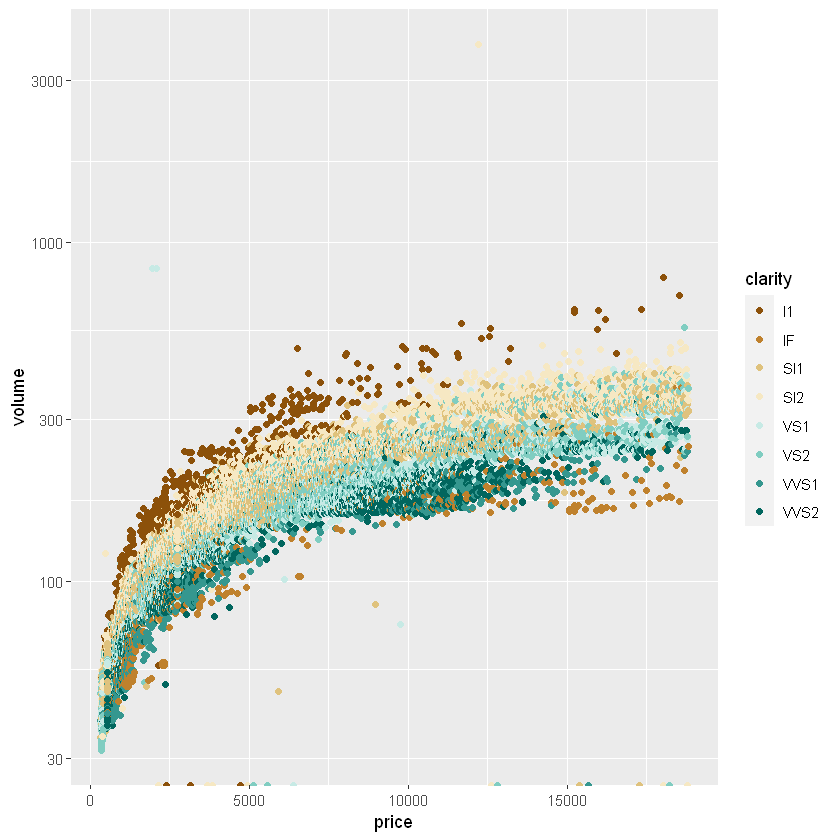

In [45]:
# they added volume again but my file still has it at this point
ggplot(aes(x = price, y = volume), data = diamonds) +
    geom_point(aes(color = clarity)) +
    scale_color_brewer(type = "div") +
    scale_y_log10()

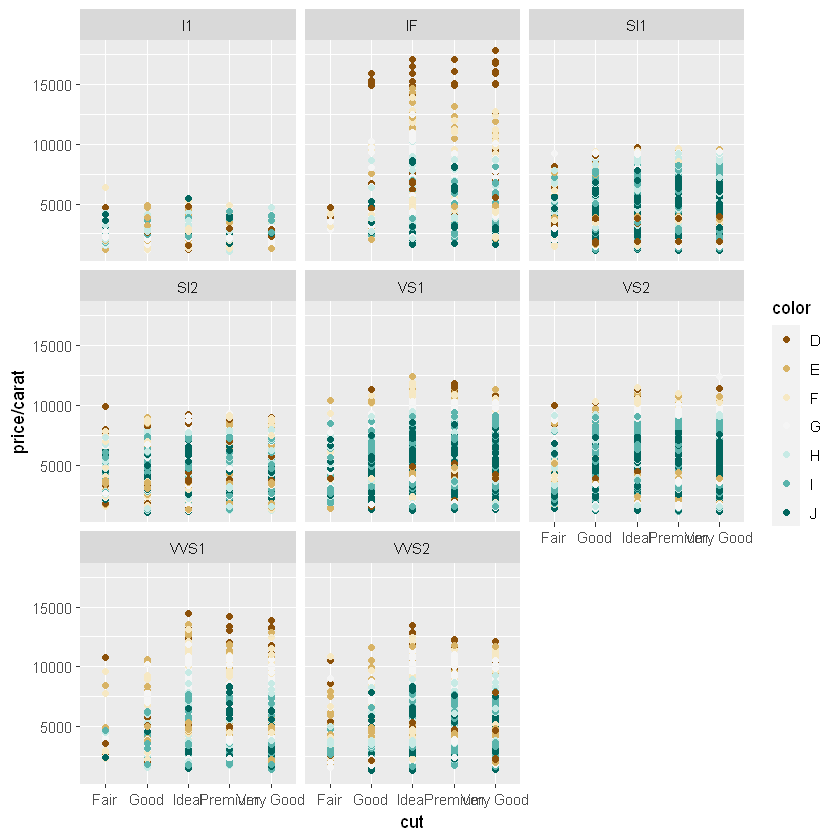

In [48]:
ggplot(aes(x = cut, y = price/carat), data = diamonds) +
    geom_point(aes(color = color)) + 
    facet_wrap(~clarity) +
    scale_color_brewer(type = "div")

In [53]:
# create correlation matrix of all columns
# set seed and sample data
set.seed(77777)
diamonds_sample <- diamonds[sample(1:length(diamonds$price), 10000),]

# seems to be a huge collection of summary information
# saved it to a file to reference later
temp <- ggpairs(diamonds_sample, wrap = c(shape = I('.'), outlier.shape = I('.')))
ggsave("tempfilediamonds.png")

Warning message in warn_if_args_exist(list(...)):
"Extra arguments: "wrap" are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string."
Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binw

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



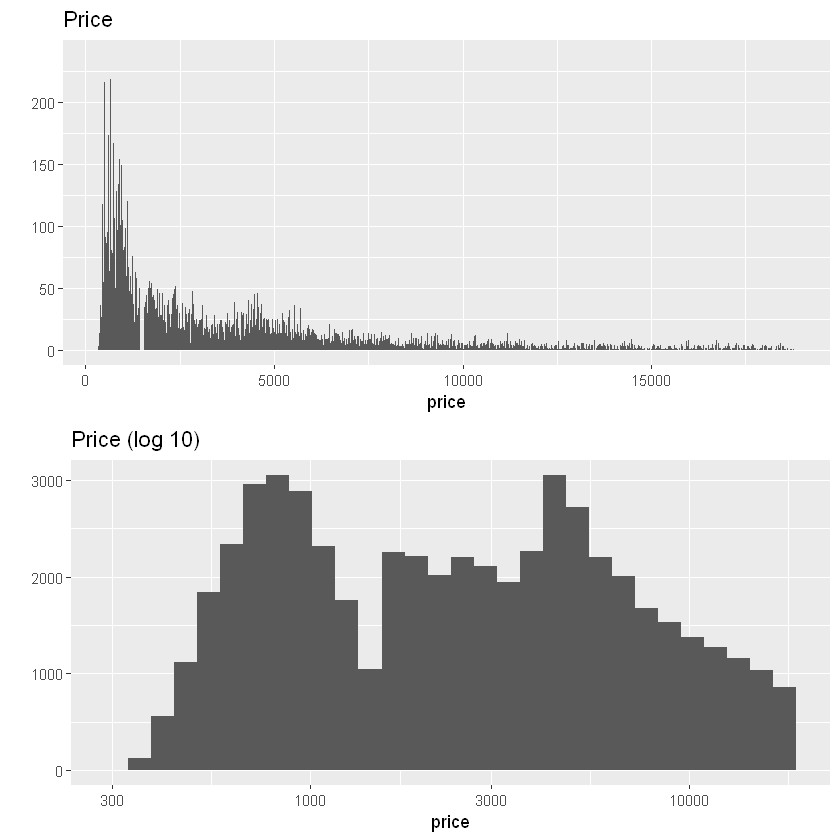

In [57]:
plot1 <- qplot(x = price, data = diamonds, binwidth = 5) +
    ggtitle("Price")

plot2 <- qplot(x = price, data = diamonds) +
    ggtitle("Price (log 10)") +
    scale_x_log10()

grid.arrange(plot1, plot2)